# Importing Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.core.interchange.dataframe_protocol import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import *
from sklearn.preprocessing import label_binarize
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


# Importing the dataset as DataFrame and Data exploration 

In [4]:
df = pd.read_csv("thyroidDF.csv")

In [5]:
df.head(10)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
5,60,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803048
6,77,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,21.0,other,-,840803068
7,28,F,f,f,f,f,f,f,f,f,...,116.0,f,NaN,f,NaN,f,NaN,SVI,-,840807019
8,28,F,f,f,f,f,f,f,f,f,...,76.0,f,NaN,f,NaN,f,NaN,other,-,840808060
9,28,F,f,f,f,f,f,f,f,f,...,83.0,f,NaN,f,NaN,f,NaN,other,-,840808073


In [6]:
# Total number of rows and columns
row, columns = df.shape
print(f'Total number of rows: {row}')
print(f'Total number of columns: {columns}')

Total number of rows: 9172
Total number of columns: 31


In [7]:
# Total number of duplicate rows
df.duplicated().sum()

0

In [8]:
# Total number of missing values in each column
df.isna().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

The “Thyroid Disease Data” UCI Machine Learning dataset contains 9,172 rows and 31 columns, with no duplicate values. However, there are significant number of missing values in the columns: Sex, TSH, T3, TT4, T4U, FTI, and TBG, with TBG column leading with 8823 null entries. 

In [10]:
# Unique values in 'sex' column
df['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [11]:
# Counting the frequency of each distinct value in the 'sex' column
df['sex'].value_counts()

sex
F    6073
M    2792
Name: count, dtype: int64

In [12]:
# Unique values in 'TSH_measured' column
df['TSH_measured'].unique()

array(['t', 'f'], dtype=object)

In [13]:
# Filtering the unique values in the 'TSH' column for rows where 'TSH_measured' is not measured to find the erroneous data. 
df['TSH'][df['TSH_measured'] == 'f'].unique()

array([nan])

In [14]:
# Counting the number of missing TSH values for patients where TSH was not measured
df['TSH'][df['TSH_measured'] == 'f'].isnull().sum()

842

In [15]:
# Counting of missing values in TSH
df['TSH'].isnull().sum()

842

The dataset has no erroneous data related to the TSH measurements. The data marked with 'f' in 'TSH_measured' has no corresponding values in 'TSH' column which is correct. 

In [17]:
# Unique values in 'T3_measured' column
df['T3_measured'].unique()

array(['f', 't'], dtype=object)

In [18]:
# Filtering the unique values in the 'T3' column for rows where 'T3_measured' is 'f' to validate the data. 
df['T3'][df['T3_measured'] == 'f'].unique()

array([nan])

In [19]:
# Counting the number of missing T3 values for patients where T3 was not measured
df['T3'][df['T3_measured'] == 'f'].isnull().sum()

2604

In [20]:
# Counting of missing values in T3
df['T3'].isnull().sum()

2604

Similarly, the dataset has no erroneous data related to the T3 measurements. The data marked with 'f' in 'T3_measured' has no corresponding values in 'T3' column which is correct. 

In [22]:
# Unique values in 'TT4_measured' column
df['TT4_measured'].unique()

array(['f', 't'], dtype=object)

In [23]:
# Filtering distinct values in the 'TT4' column for rows where 'TT4_measured' is 'f' 
df['TT4'][df['TT4_measured'] == 'f'].unique()

array([nan])

In [24]:
# Counts the number of missing TT4 values for patients where TT4 was not measured
df['TT4'][df['TT4_measured'] == 'f'].isnull().sum()

442

In [25]:
# Count of missing values in TT4
df['TT4'].isnull().sum()

442

Similarly, the dataset has no erroneous data related to the TT4 measurements. The data marked with 'f' in 'TT4_measured' has no corresponding values in 'TT4' column which is correct. 

In [27]:
# Unique values in 'T4U_measured' column
df['T4U_measured'].unique()

array(['f', 't'], dtype=object)

In [28]:
# Filtering the unique values 'T4U' column for rows where 'T4U_measured' is 'f'
df['T4U'][df['T4U_measured'] == 'f'].unique()

array([nan])

In [29]:
# Counting the number of missing T4U values for patients where T4U was not measured
df['T4U'][df['T4U_measured'] == 'f'].isnull().sum()

809

In [30]:
# Counting of missing values in T4U
df['T4U'].isnull().sum()

809

Similarly, the dataset has no erroneous data related to the T4U measurements. The data marked with 'f' in 'T4U_measured' has no corresponding values in 'T4U' column which is correct. 

In [32]:
# Unique values in 'FTI_measured' column
df['FTI_measured'].unique()

array(['f', 't'], dtype=object)

In [33]:
# Extracting the unique values in the 'FTI' column for rows where 'FTI_measured' is 'f'
df['FTI'][df['FTI_measured'] == 'f'].unique()

array([nan])

In [34]:
# Counting the number of missing FTI values for patients where FTI was not measured
df['FTI'][df['FTI_measured'] == 'f'].isnull().sum()

802

In [35]:
# Counting of missing values in FTI
df['FTI'].isnull().sum()

802

Similarly, the dataset has no erroneous data related to the FTI measurements. The data marked with 'f' in 'FTI_measured' has no corresponding values in 'FTI' column which is correct. 

In [37]:
# Unique values in 'TBG_measured' column
df['TBG_measured'].unique()

array(['f', 't'], dtype=object)

In [38]:
# Filtering the distinct values in the 'TBG' column for rows where 'TBG_measured' is 'f'
df['TBG'][df['TBG_measured'] == 'f'].unique()

array([nan])

In [39]:
# Counting the number of missing TBG values for patients where TBG was not measured
df['TBG'][df['TBG_measured'] == 'f'].isnull().sum()

8823

In [40]:
# Counting of missing values in TBG
df['TBG'].isnull().sum()

8823

Similarly, the dataset has no erroneous data related to the TBG measurements. The data marked with 'f' in 'TBG_measured' has no corresponding values in 'FBG' column which is correct. 

**Conclusion:** 

Based on analysis, the dataset has no error entries in TSH, T3, TT4, T4U, FTI, and TBG measurements as null values in the TSH, T3, TT4, T4U, FTI, and TBG columns has corresponding TSH_measured, T3_measured, TT4_measured, T4U_measured, FTI_measured, and TBG_measured values with the 'f' values. For the patients where the test were not taken, there is no measured value or data. 

# Feature Engineering

In [44]:
# Unique classes in 'target' column
df['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

**Diagnosis**

The diagnosis data can be categorized into 8 large classes: 

1. Hyperthyroid conditions: A-hyperthyroid, B - T3 toxic, C - toxic goitre, D - secondary toxic
2. Hypothyroid conditions:  E - hypothyroid, F - primary hypothyroid, G - compensated hypothyroid, H - secondary hypothyroid
3. Binding Protein: I - Increased binding protein, J - Decreased binding protein
4. General health condition: K - Concurrent non-thyroidal illness
5. Replacement Therapy: L - Consistent with replacement therapy, M - Underreplaced, N - Overreplaced
6. Antithyroid Treatment: O - Antithyroid drugs, P - I131 treatment, Q - Surgery
7. Miscellaneous: R - Discordant assay results, S - Elevated TBG, T - Elevated thyroid hormones
8. Normal condition: '-' (without disease)

The diagnosis in the form of  "X|Y" is interpreted as "consistent with X, but more likely Y". 




In [46]:
# Defining  diagnosis groups 

hyperthyroid_conditions = ['A', 'B', 'C', 'D']  #Hyperthyroid
hypothyroid_conditions = ['E', 'F', 'G', 'H'] #Hypothyroid
replacement_therapy = ['L', 'M', 'N'] #Related to synthetic hormone use
binding_protein = ['I', 'J'] #TBG-related problems
non_thyroidal_illness = ['K', 'R', 'S', 'T']	#Indirect or related issues
treatment_effects = ['O', 'P', 'Q'] #Due to the interventions
normal_conditions = ['-'] #Negative

# Mapping logic
def categorize_target(value):
    diagnoses = value.split('|')
    
    for diagnosis in diagnoses:
        if diagnosis in hyperthyroid_conditions:
            return 'Hyperthyroid'
        if diagnosis in hypothyroid_conditions:
            return 'Hypothyroid'
        if diagnosis in replacement_therapy:
            return 'Replacement Therapy'
        if diagnosis in binding_protein:
            return 'Binding Protein'
        if diagnosis in non_thyroidal_illness:
            return 'Non-thyroidal Illness'
        if diagnosis in treatment_effects:
            return 'Treatment Effect'
        if diagnosis in normal_conditions:
            return 'Negative'
    
# Apply the categorization to DataFrame
df['target'] = df['target'].apply(categorize_target)

In [47]:
#Unique Classes in 'target' column
df['target'].unique()

array(['Negative', 'Non-thyroidal Illness', 'Hypothyroid', None,
       'Binding Protein', 'Replacement Therapy', 'Hyperthyroid',
       'Treatment Effect'], dtype=object)

In [48]:
#  Counting the frequency of each unique classes in the 'target' column
df['target'].value_counts()

target
Negative                 6771
Non-thyroidal Illness     717
Hypothyroid               601
Binding Protein           376
Replacement Therapy       336
Hyperthyroid              195
Treatment Effect           33
Name: count, dtype: int64

In [49]:
# Counting the missing values in 'target' column
df['target'].isnull().sum()

143

## Data Cleaning
The missing values were handled using appropriate imputation method: 

1. Columns with missed 'target' value were dropped. 
2. Missing values in the 'Sex' column were imputed using the mode of the column.
3. Missing values in TSH, T3, TT4, T4U were imputed with the median of the respective columns.
4. The TBG column was dropped entirely due a notable number of null entries in it, particularly, 8823 null values.

Additionaly 
FTI were dropped


In [51]:
df = df.dropna(subset=['target'])

In [52]:
# Imputing the missing values in 'sex' column with mode which is 'F' - Female 
sex_mode = df['sex'].mode()[0]
sex_mode

'F'

In [53]:
df['sex'] = df['sex'].fillna(sex_mode)
df['sex'].isna().sum()

0

In [54]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')

Additional to the 'TBG' column, the columns TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'patient_id' were dropped as they do not contribute to the analysis and prediction. 

In [56]:
# List of columns that were dropped
col_to_drop = ['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'patient_id', 'referral_source',
        'TBG']

In [57]:
# Dropping the columns in the 'col_to_drop' list 
df.drop(col_to_drop, axis = 1, inplace = True)

In [58]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'target'],
      dtype='object')

In [59]:
# List of columns still containing missing values
col_with_null = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [60]:
# Correlating the columns in 'col_with_null' to find the suitable imputation method and finding if the column should be kept  
correlation_matrix = df[col_with_null].corr()
print(correlation_matrix)

          TSH        T3       TT4       T4U       FTI
TSH  1.000000 -0.153425 -0.275152  0.077594 -0.275518
T3  -0.153425  1.000000  0.557632  0.333870  0.387316
TT4 -0.275152  0.557632  1.000000  0.373304  0.750770
T4U  0.077594  0.333870  0.373304  1.000000 -0.233350
FTI -0.275518  0.387316  0.750770 -0.233350  1.000000


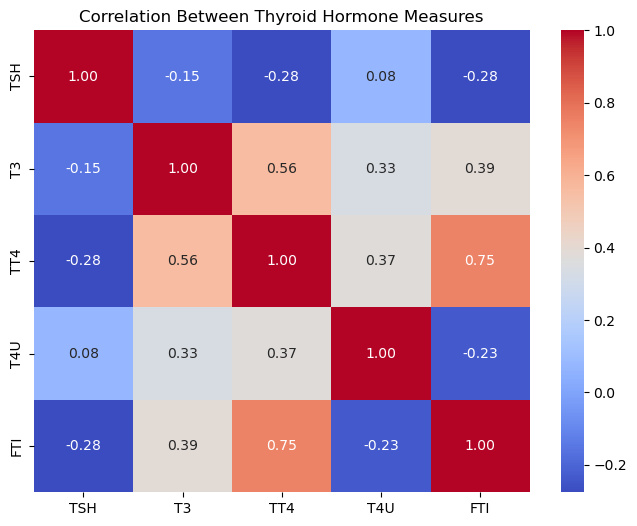

In [61]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Thyroid Hormone Measures')
plt.show()


Based on correlation matrix, we found that there are strong correlations between 'TT4' and 'FTI' columns (75%), and moderate correlation between the columns 'T3' and 'TT4' (56%) , 'TT4' and 'T4U' (37%), 'T3' and 'FTI' (39%) columns. 

Columns that have weak/moderate correlation with other columns are TSH, T3, T4U, these columns should be kept in. 

Columns 'TT4' and 'FTI' have strong correlation score of 75%. In most cases, FTI is calculated from devision of TT4 by T4U, therefore, the column 'FTI' is dependent column, it can be dropped. 


In [63]:
df.drop('FTI' , axis = 1, inplace = True)

In [64]:
df.isna().sum()

age                       0
sex                       0
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     840
T3                     2603
TT4                     442
T4U                     806
target                    0
dtype: int64

In [65]:
# Unique values in the columns with 'object' data type
for i in df.columns:
    if df[i].dtype == 'object':
        print(f'Unique values in {i}: {df[i].unique()}')

Unique values in sex: ['F' 'M']
Unique values in on_thyroxine: ['f' 't']
Unique values in query_on_thyroxine: ['f' 't']
Unique values in on_antithyroid_meds: ['f' 't']
Unique values in sick: ['f' 't']
Unique values in pregnant: ['f' 't']
Unique values in thyroid_surgery: ['f' 't']
Unique values in I131_treatment: ['f' 't']
Unique values in query_hypothyroid: ['t' 'f']
Unique values in query_hyperthyroid: ['f' 't']
Unique values in lithium: ['f' 't']
Unique values in goitre: ['f' 't']
Unique values in tumor: ['f' 't']
Unique values in hypopituitary: ['f' 't']
Unique values in psych: ['f' 't']
Unique values in target: ['Negative' 'Non-thyroidal Illness' 'Hypothyroid' 'Binding Protein'
 'Replacement Therapy' 'Hyperthyroid' 'Treatment Effect']


In [66]:
#Shape of df
df.shape

(9029, 21)

In [67]:
#Unique values in 'age' column
df['age'].unique()

array([   29,    41,    36,    32,    60,    77,    28,    54,    42,
          51,    37,    16,    43,    63,    40,    56,    85,    71,
          67,    55,    61,    46,    44,    82,    64,    70,    33,
          59,    53,    52,    49,    35,    48,    27,    69,    76,
          73,    68,    66,    30,    88,    38,    58,    21,    45,
          83,    62,    25,    86,    75,    72,    14,    15,    39,
          26,    20,    80,    90,    23,    18,    13,    78,    24,
          81,    92,    57,    74,     9,    47,    17,    11,    50,
          34,     8,    79,    31,    65,    84,    12,    10,    19,
          22,     1,     2,    97,     6,    89,    87,   455,    93,
           7,    91,     5,    94,     4, 65511,    95, 65512,     3,
       65526])

There are some discrepencies in the 'age' column. It is containing values like 455, 65511, 65512, and 65526 which indicates to the inconsistent data points.

In [69]:
# Filtering the values in 'age' column 
df = df[df['age'] <= 100]

# Unique values in 'age' column
df['age'].unique()

array([29, 41, 36, 32, 60, 77, 28, 54, 42, 51, 37, 16, 43, 63, 40, 56, 85,
       71, 67, 55, 61, 46, 44, 82, 64, 70, 33, 59, 53, 52, 49, 35, 48, 27,
       69, 76, 73, 68, 66, 30, 88, 38, 58, 21, 45, 83, 62, 25, 86, 75, 72,
       14, 15, 39, 26, 20, 80, 90, 23, 18, 13, 78, 24, 81, 92, 57, 74,  9,
       47, 17, 11, 50, 34,  8, 79, 31, 65, 84, 12, 10, 19, 22,  1,  2, 97,
        6, 89, 87, 93,  7, 91,  5, 94,  4, 95,  3])

In [70]:
df.shape

(9025, 21)

In [71]:
# Checking whether data has any anomalies where patient is male but have 'true' in 'pregnant' column
df[(df['sex']=='Male') & (df['pregnant'] == 't')]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,target


There are no instances in the dataset where a "Male" is marked as "pregnant." This is a logical result and validates the integrity of the data for this specific condition. In such cases, we can infer that:

* The dataset does not contain biologically implausible entries for this scenario.
* The data aligns with expected real-world constraints (assuming there are no labeling or data entry errors).

In [73]:
# Creating a copy of 'df' without any null values for data visualization
df1 = df.copy()

# Data Split

Splitting the dataset with stratification as the dataset is highly imbalanced 

In [76]:
X = df.drop('target', axis=1)
y = df['target']

# Step 2: Train+Val vs Test (85% / 15%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42
)

# Step 3: Train vs Val (from 85%, split ~70:15 original ratio)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, stratify=y_temp, random_state=42
)

# Output shapes
print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")


Train: (6320, 20), Validation: (1351, 20), Test: (1354, 20)


Class counts per split:
 Class       Binding Protein  Hyperthyroid  Hypothyroid  Negative  \
Split                                                              
Test                     57            29           90      1015   
Train                   263           137          421      4739   
Validation               56            29           90      1013   

Class       Non-thyroidal Illness  Replacement Therapy  Treatment Effect  
Split                                                                     
Test                          108                   50                 5  
Train                         502                  235                23  
Validation                    107                   51                 5  


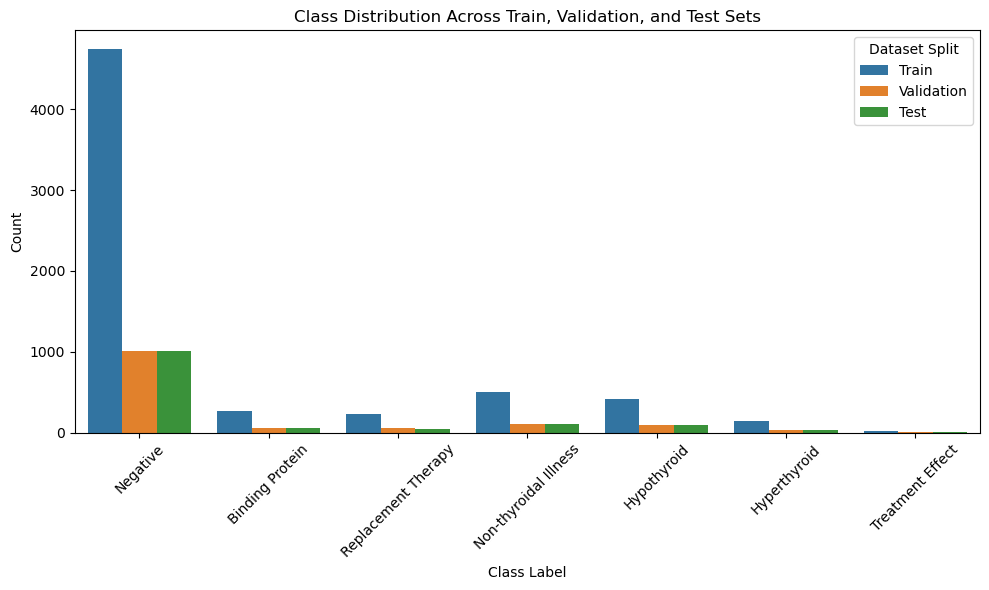

In [77]:
# Combine the target data (y_train, y_val, y_test) into a single DataFrame with their respective splits
split_labels = ['Train'] * len(y_train) + ['Validation'] * len(y_val) + ['Test'] * len(y_test)
combined_y = pd.concat([y_train, y_val, y_test], axis=0).reset_index(drop=True)
split_df = pd.DataFrame({'Split': split_labels, 'Class': combined_y})

# Calculate and print the class counts for each split
class_counts = split_df.groupby(['Split', 'Class']).size().unstack(fill_value=0)
print("Class counts per split:\n", class_counts)

# Plot the class distribution per split
plt.figure(figsize=(10, 6))
sns.countplot(data=split_df, x='Class', hue='Split')
plt.title('Class Distribution Across Train, Validation, and Test Sets')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.legend(title='Dataset Split')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Data imputing 

Adding data imputation to handle missing values in 'TSH', 'T3', 'TT4', 'T4U' columns. We are adding median values instead missed values. 
The imputation is being added into Train set, then validation and test sets were transformed for consistency.

In [80]:
# Impute missing values for numerical columns (TSH, T3, TT4, T4U)
num_cols = ['TSH', 'T3', 'TT4', 'T4U']

imputer = SimpleImputer(strategy='median')

# Fit and transform the imputer on the training data, then transform on test and validation
X_train[num_cols] = imputer.fit_transform(X_train[num_cols])
X_val[num_cols] = imputer.transform(X_val[num_cols])
X_test[num_cols] = imputer.transform(X_test[num_cols])

# Output the shapes to verify
print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")


Train: (6320, 20), Validation: (1351, 20), Test: (1354, 20)


# Data encoding 

In [82]:
# Check the unique data types for each column
print(df.dtypes)

age                      int64
sex                     object
on_thyroxine            object
query_on_thyroxine      object
on_antithyroid_meds     object
sick                    object
pregnant                object
thyroid_surgery         object
I131_treatment          object
query_hypothyroid       object
query_hyperthyroid      object
lithium                 object
goitre                  object
tumor                   object
hypopituitary           object
psych                   object
TSH                    float64
T3                     float64
TT4                    float64
T4U                    float64
target                  object
dtype: object


In [83]:
# Check the unique values for each categorical column
for col in df.columns:
    if df[col].dtype == 'object':  # For categorical columns
        print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'sex': ['F' 'M']
Unique values in 'on_thyroxine': ['f' 't']
Unique values in 'query_on_thyroxine': ['f' 't']
Unique values in 'on_antithyroid_meds': ['f' 't']
Unique values in 'sick': ['f' 't']
Unique values in 'pregnant': ['f' 't']
Unique values in 'thyroid_surgery': ['f' 't']
Unique values in 'I131_treatment': ['f' 't']
Unique values in 'query_hypothyroid': ['t' 'f']
Unique values in 'query_hyperthyroid': ['f' 't']
Unique values in 'lithium': ['f' 't']
Unique values in 'goitre': ['f' 't']
Unique values in 'tumor': ['f' 't']
Unique values in 'hypopituitary': ['f' 't']
Unique values in 'psych': ['f' 't']
Unique values in 'target': ['Negative' 'Non-thyroidal Illness' 'Hypothyroid' 'Binding Protein'
 'Replacement Therapy' 'Hyperthyroid' 'Treatment Effect']


1. Label encoding for binary values in columns 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych'.
3. Label Encoding for the target variable

In [85]:
# Define LabelEncoder
le = LabelEncoder()

# Binary categorical columns
binary_cols = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick',
               'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid',
               'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych']

# Apply Label Encoding for binary columns
for col in binary_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_val[col] = le.transform(X_val[col])  # Ensure no data leakage from the validation set
    X_test[col] = le.transform(X_test[col])
    
# Ensure consistent column alignment across all sets
# Align columns by adding missing columns in validation/test if needed (from train set)
# After encoding binary columns
X_val_aligned, _ = X_val.align(X_train, join='left', axis=1, fill_value=0)
X_test_aligned, _ = X_test.align(X_train, join='left', axis=1, fill_value=0)

X_val = X_val_aligned
X_test = X_test_aligned

# Check the shapes after encoding
print(f"Train X shape: {X_train.shape}")
print(f"Validation X shape: {X_val.shape}")
print(f"Test X shape: {X_test.shape}")

# Encode the target variable (y)
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)  # Use transform to avoid data leakage
y_test = le.transform(y_test)

# Check the shapes after encoding
print(f"Train y shape: {y_train.shape}")
print(f"Validation y shape: {y_val.shape}")
print(f"Test y shape: {y_test.shape}")

Train X shape: (6320, 20)
Validation X shape: (1351, 20)
Test X shape: (1354, 20)
Train y shape: (6320,)
Validation y shape: (1351,)
Test y shape: (1354,)


# Data scaling 

Numeric columns in the dataset: ['age', 'TSH', 'T3', 'TT4', 'T4U']

In [88]:
print(X_train[['age', 'TSH', 'T3', 'TT4', 'T4U']].describe())

              age          TSH           T3          TT4          T4U
count  6320.00000  6320.000000  6320.000000  6320.000000  6320.000000
mean     51.98038     4.436744     1.965611   108.291361     0.975215
std      18.86952    19.193283     0.770075    36.105811     0.192839
min       1.00000     0.005000     0.050000     2.000000     0.170000
25%      37.00000     0.600000     1.700000    89.000000     0.870000
50%      55.00000     1.400000     1.900000   104.000000     0.960000
75%      67.00000     2.500000     2.200000   123.000000     1.050000
max      97.00000   500.000000    18.000000   450.000000     2.330000


Scaling is necessary in all columns as they have widely different scales. 

In [90]:
# Features to scale
scale_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U']

# Initialize scaler
scaler = StandardScaler()

# Fit on training only (to prevent data leakage), transform all
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_val[scale_cols] = scaler.transform(X_val[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])
# Check the shapes after scaling
print(f"Train X shape: {X_train.shape}")
print(f"Validation X shape: {X_val.shape}")
print(f"Test X shape: {X_test.shape}")
# Check the shapes after scaling
print(f"Train y shape: {y_train.shape}")
print(f"Validation y shape: {y_val.shape}")
print(f"Test y shape: {y_test.shape}")

Train X shape: (6320, 20)
Validation X shape: (1351, 20)
Test X shape: (1354, 20)
Train y shape: (6320,)
Validation y shape: (1351,)
Test y shape: (1354,)


# UDF to plot AU-PRC Curve

In [92]:
# Creating a function 'au_prc' to plot AU-PRC curve along with Average Precision for each class
def au_prc(y_test_data, y_score_data):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    from sklearn.preprocessing import label_binarize
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Binarize the labels for multi-class OvR
    classes = np.unique(y_test_data)
    y_true_binarized = label_binarize(y_test_data, classes=classes)
    
    # Store precision-recall metrics for each class
    precision_dict = {}
    recall_dict = {}
    average_precision_dict = {}
    
    for i, class_label in enumerate(classes):
        precision_dict[class_label], recall_dict[class_label], _ = precision_recall_curve(
            y_true_binarized[:, i], y_score_data[:, i]
        )
        average_precision_dict[class_label] = average_precision_score(
            y_true_binarized[:, i], y_score_data[:, i]
        )
    
    # Compute micro-average PR curve
    precision_micro, recall_micro, _ = precision_recall_curve(
        y_true_binarized.ravel(), y_score_data.ravel()
    )
    average_precision_micro = average_precision_score(y_true_binarized, y_score_data, average="micro")
    
    # Plot Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    for class_label in classes:
        plt.plot(
            recall_dict[class_label], 
            precision_dict[class_label], 
            label=f"Class {class_label} (AP = {average_precision_dict[class_label]:.2f})"
        )
    
    # Add micro-average curve
    plt.plot(
        recall_micro, 
        precision_micro, 
        label=f"Micro-Average (AP = {average_precision_micro:.2f})", 
        color='gold', linestyle='--'
    )
    
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve for Multi-Class Classification")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


In [93]:
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_test shape: (1354, 20)
y_test shape: (1354,)


# Data Modelling

## Logistic Regression


Confusion Matrix:
 [[ 22   3   0  30   2   0   0]
 [  4  19   0   5   0   1   0]
 [  0   0  61  28   1   0   0]
 [  5   2   1 992  10   5   0]
 [  1   0   0  73  33   1   0]
 [  0   0   0  24   0  26   0]
 [  0   0   1   4   0   0   0]]

Accuracy: 0.8515509601181684

Class 0: Average Precision = 0.5666509102288604
Class 1: Average Precision = 0.7623104061977627
Class 2: Average Precision = 0.9611622642707014
Class 3: Average Precision = 0.938601793026086
Class 4: Average Precision = 0.5209215352542863
Class 5: Average Precision = 0.6901723459042207
Class 6: Average Precision = 0.2907349896480331
Micro-average Precision Score: 0.8960512145101439


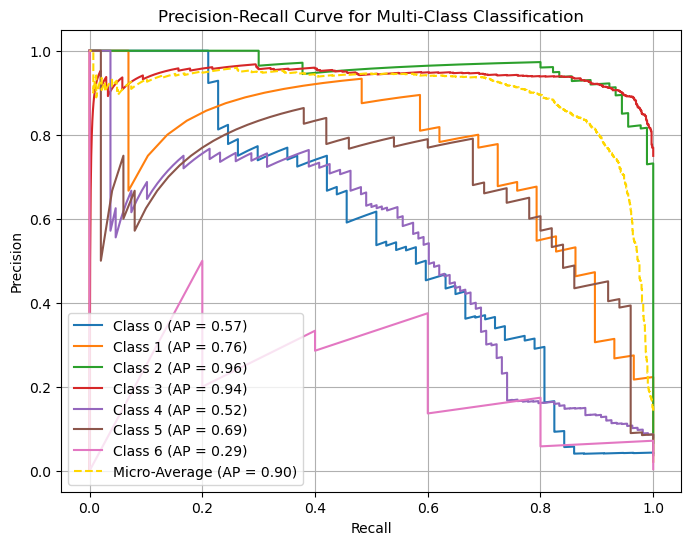

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, average_precision_score
from sklearn.preprocessing import label_binarize

# Assume your data is already split into X_train, X_test, y_train, y_test
# For instance, X_train and y_train are your training features and labels
# Logistic Regression Model
lr = LogisticRegression(max_iter=200, random_state=42)

# Train the model
lr.fit(X_train, y_train)

# Make Predictions
y_pred = lr.predict(X_test)
y_score = lr.predict_proba(X_test)  # for average precision score

# Binarize the target for multiclass precision
y_test_binarized = label_binarize(y_test, classes=lr.classes_)

# Evaluate
print(f'\nConfusion Matrix:\n {confusion_matrix(y_test, y_pred)}\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')

# Compute Average Precision Score for each class
average_precisions = []
for i, class_label in enumerate(lr.classes_):
    avg_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    average_precisions.append(avg_precision)
    print(f'Class {class_label}: Average Precision = {avg_precision}')

# Micro Average Precision (unweighted mean)
print(f"Micro-average Precision Score: {average_precision_score(y_test_binarized, y_score, average='micro')}")

au_prc(y_test_data=y_test, y_score_data=y_score)  


## Random Forest Classifier


 [[ 41   3   0  12   1   0   0]
 [  5  18   0   4   2   0   0]
 [  0   0  86   0   2   1   1]
 [  8   3   1 976  24   3   0]
 [  1   2   0  33  72   0   0]
 [  0   0   0  13   1  36   0]
 [  0   0   1   2   1   0   1]]

Accuracy: 0.9084194977843427

Class 0: Average Precision = 0.849500954901345
Class 1: Average Precision = 0.8061196725089043
Class 2: Average Precision = 0.9955294135507167
Class 3: Average Precision = 0.9905323580447626
Class 4: Average Precision = 0.7627974834777408
Class 5: Average Precision = 0.8975208121512936
Class 6: Average Precision = 0.5911111111111111
Micro-average Precision Score: 0.9746931009256258


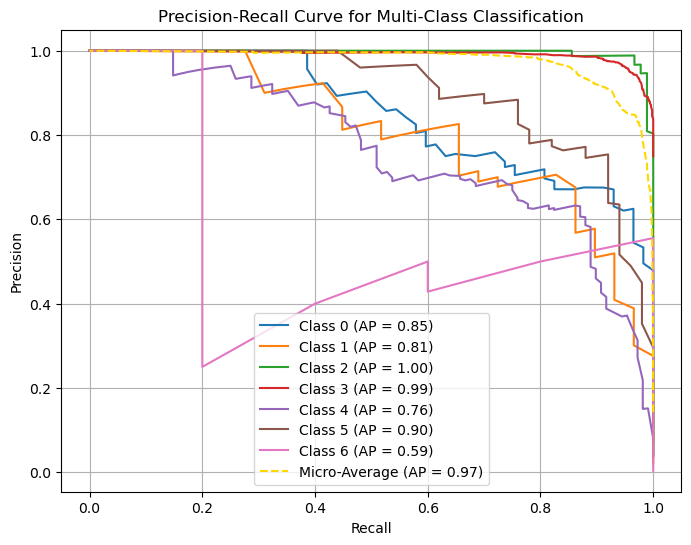

In [99]:
from sklearn.ensemble import RandomForestClassifier

# Training Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Making Predictions
y_pred = rf.predict(X_test)
y_score = rf.predict_proba(X_test)

# Binarize the target for multiclass precision
y_test_binarized = label_binarize(y_test, classes=lr.classes_)

#Evaluate
print(f'\n {confusion_matrix(y_test, y_pred)}\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
# Compute Average Precision Score for each class
average_precisions = []
for i, class_label in enumerate(lr.classes_):
    avg_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    average_precisions.append(avg_precision)
    print(f'Class {class_label}: Average Precision = {avg_precision}')
# Micro Average Precision (unweighted mean)
print(f"Micro-average Precision Score: {average_precision_score(y_test_binarized, y_score, average='micro')}")
au_prc(y_test_data= y_test, y_score_data= y_score)

In [103]:
# Training Random Forest Clssifier with customized Class Weights
rf2 = RandomForestClassifier(random_state=42, class_weight={'0':1500, '1':100, '2':25})
rf2.fit(X_train, y_train)

# Making Predictions
y_pred = rf2.predict(X_test)
y_score = rf2.predict_proba(X_test)

# Binarize the target for multiclass precision
y_test_binarized = label_binarize(y_test, classes=lr.classes_)

#Evaluate
print(f'\n {confusion_matrix(y_test, y_pred)}\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
# Compute Average Precision Score for each class
average_precisions = []
for i, class_label in enumerate(lr.classes_):
    avg_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    average_precisions.append(avg_precision)
    print(f'Class {class_label}: Average Precision = {avg_precision}')
# Micro Average Precision (unweighted mean)
print(f"Micro-average Precision Score: {average_precision_score(y_test_binarized, y_score, average='micro')}")
au_prc(y_test_data= y_test, y_score_data= y_score)

## Gradient Boosting Classifier


 [[ 53   3   0   1   0   0   0]
 [  1  26   0   1   1   0   0]
 [  0   0  83   0   2   3   2]
 [ 30   8   1 874  78  24   0]
 [  1   3   0  15  89   0   0]
 [  0   0   0   2   1  47   0]
 [  0   0   0   0   0   0   5]]

Accuracy: 0.8692762186115214

Class 0: Average Precision = 0.8152467613422103
Class 1: Average Precision = 0.8794861902281117
Class 2: Average Precision = 0.9946970858510492
Class 3: Average Precision = 0.9863230908578587
Class 4: Average Precision = 0.7045480415002405
Class 5: Average Precision = 0.8950575974101193
Class 6: Average Precision = 0.8761904761904762
Micro-average Precision Score: 0.9341610523803203


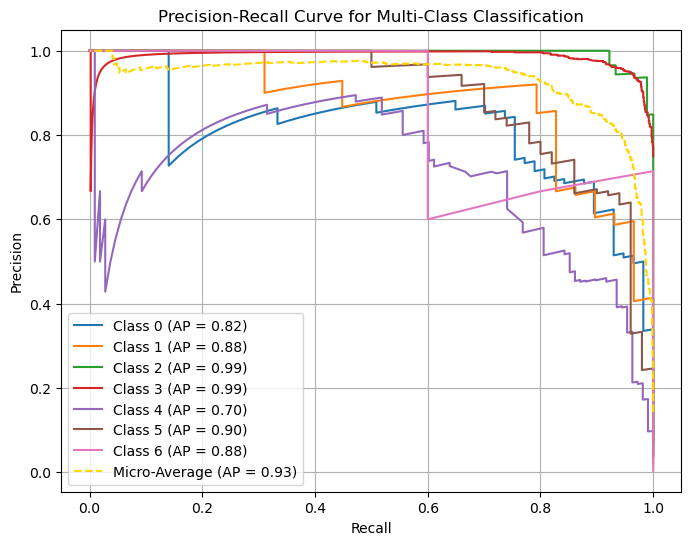

In [106]:
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.ensemble import GradientBoostingClassifier

# Compute sample weights to balance the classes
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Train the GradientBoostingClassifier with the sample weights
gb = GradientBoostingClassifier(random_state=10)
gb.fit(X_train, y_train, sample_weight=sample_weights)

# Making Predictions
y_pred = gb.predict(X_test)
y_score = gb.predict_proba(X_test)

# Binarize the target for multiclass precision
y_test_binarized = label_binarize(y_test, classes=lr.classes_)

#Evaluate
print(f'\n {confusion_matrix(y_test, y_pred)}\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
# Compute Average Precision Score for each class
average_precisions = []
for i, class_label in enumerate(lr.classes_):
    avg_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    average_precisions.append(avg_precision)
    print(f'Class {class_label}: Average Precision = {avg_precision}')
# Micro Average Precision (unweighted mean)
print(f"Micro-average Precision Score: {average_precision_score(y_test_binarized, y_score, average='micro')}")
au_prc(y_test_data= y_test, y_score_data= y_score)

## XGBoost Classifier

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:07:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 [[ 52   3   0   2   0   0   0]
 [  2  25   0   1   1   0   0]
 [  0   0  83   0   2   4   1]
 [ 15   3   1 923  66   6   1]
 [  1   2   0  10  95   0   0]
 [  0   0   0   3   2  45   0]
 [  0   0   0   0   1   0   4]]

Accuracy: 0.9062038404726735

Class 0: Average Precision = 0.9384183362266
Class 1: Average Precision = 0.8714993297051083
Class 2: Average Precision = 0.9913769926803375
Class 3: Average Precision = 0.9953258284435547
Class 4: Average Precision = 0.8130174853284245
Class 5: Average Precision = 0.9156438754964722
Class 6: Average Precision = 0.8211111111111111
Micro-average Precision Score: 0.9751566776113435


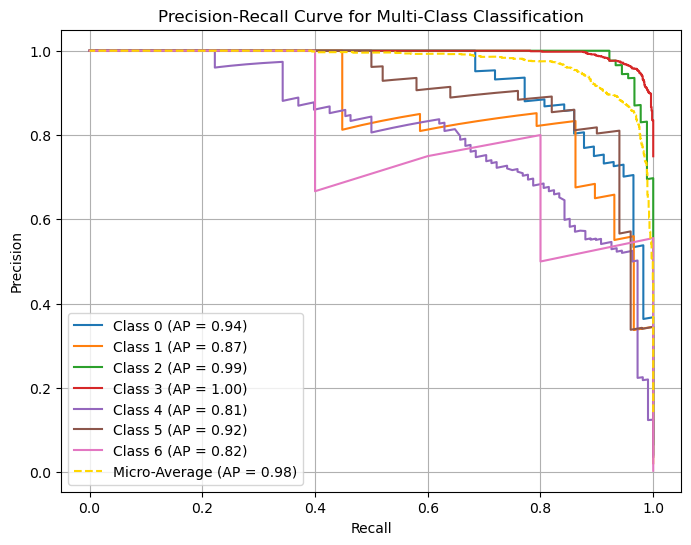

In [125]:
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBClassifier

# Compute sample weights to balance the classes
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Train the XGBoostingClassifier with the sample weights
xgb = XGBClassifier(
    random_state=10,
    eval_metric='mlogloss',
    scale_pos_weight=1,  
    use_label_encoder=False,
    max_depth=6,
    learning_rate=0.1,
    n_estimators=200
)

xgb.fit(X_train, y_train, sample_weight=sample_weights)

# Making Predictions
y_pred = xgb.predict(X_test)
y_score = xgb.predict_proba(X_test)

# Binarize the target for multiclass precision
y_test_binarized = label_binarize(y_test, classes=lr.classes_)

#Evaluate
print(f'\n {confusion_matrix(y_test, y_pred)}\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
# Compute Average Precision Score for each class
average_precisions = []
for i, class_label in enumerate(lr.classes_):
    avg_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    average_precisions.append(avg_precision)
    print(f'Class {class_label}: Average Precision = {avg_precision}')
print(f"Micro-average Precision Score: {average_precision_score(y_test_binarized, y_score, average='micro')}")
au_prc(y_test_data= y_test, y_score_data= y_score)

## Support Vector Machine

In [127]:
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score

# Standardize Features (SVM Performs Better with Normalized Data)
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

# Compute Sample Weights to Balance the Classes
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Train Support Vector Machine (SVM) Classifier
svm = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=10)
svm.fit(x_train, y_train, sample_weight=sample_weights)

# Making Predictions
y_pred = svm.predict(X_test)
y_score = svm.predict_proba(X_test)  # Get class probabilities

# Binarize the target for multiclass precision
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])

# Evaluate Performance
print(f'\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}\n')

# Compute Average Precision Score for each class
average_precisions = []
for i, class_label in enumerate(target_map.keys()):
    if y_test_binarized[:, i].sum() > 0:  # Ensure at least one sample in the class
        avg_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    else:
        avg_precision = 0  # Avoid errors in case of missing class
    average_precisions.append(avg_precision)
    print(f'Class {class_label}: Average Precision = {avg_precision:.4f}')

# Micro-average Precision Score
print(f"Micro-average Precision Score: {average_precision_score(y_test_binarized, y_score, average='micro'):.4f}")


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(



Confusion Matrix:
[[ 52   4   0   0   1   0   0]
 [  5  22   0   0   2   0   0]
 [  3   0  84   0   3   0   0]
 [114  12  87   3 799   0   0]
 [  2  17   0   0  89   0   0]
 [  5  11  16   0  15   3   0]
 [  1   0   2   0   2   0   0]]

Accuracy: 0.1869

Class Hyperthyroid: Average Precision = 0.6178
Class Hypothyroid: Average Precision = 0.6603
Class Negative: Average Precision = 0.8748
Class Non-thyroidal Illness: Average Precision = 0.9403
Class Replacement Therapy: Average Precision = 0.4438
Class Treatment Effect: Average Precision = 0.5961
Class Binding Protein: Average Precision = 0.0693
Micro-average Precision Score: 0.8891


## Deep Learning Models


In [133]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights for imbalanced data
class_weights_dict = dict(enumerate(compute_class_weight(class_weight='balanced', 
                                                         classes=np.unique(y_train), 
                                                         y=y_train)))

# Define Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(7, activation='softmax')  # 3 classes
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=50, batch_size=32, 
                    class_weight=class_weights_dict, 
                    verbose=1)

# Predictions
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluate
print(f'\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')


Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 7)

## KNN model 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score

# Mapping the Encoded Target values to Different Classes of Thyroid Conditions
target_map ={'Hyperthyroid':0, 'Hypothyroid':1, 'Negative':2, 'Non-thyroidal Illness':3, 'Replacement Therapy':4, 'Treatment Effect':5, 'Binding Protein':6}
y_train_encoded = y_train.map(target_map)
y_test_encoded = y_test.map(target_map)

# Standardize Features (KNN also benefits from normalized data)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Compute sample weights to balance the classes
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_encoded)

# Train K-Nearest Neighbors (KNN) Classifier
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(x_train, y_train_encoded)

# Making Predictions
y_pred = knn.predict(x_test)
y_score = knn.predict_proba(x_test)  # Get class probabilities

# Binarize the target for multiclass precision
y_test_binarized = label_binarize(y_test_encoded, classes=[0, 1, 2, 3, 4, 5, 6])

# Evaluate Performance
print(f'\nConfusion Matrix:\n{confusion_matrix(y_test_encoded, y_pred)}\n')
print(f'Accuracy: {accuracy_score(y_test_encoded, y_pred):.4f}\n')

# Compute Average Precision Score for each class
average_precisions = []
for i, class_label in enumerate(target_map.keys()):
    if y_test_binarized[:, i].sum() > 0:  # Ensure at least one sample in the class
        avg_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    else:
        avg_precision = 0  # Avoid errors in case of missing class
    average_precisions.append(avg_precision)
    print(f'Class {class_label}: Average Precision = {avg_precision:.4f}')

# Micro-average Precision Score
print(f"Micro-average Precision Score: {average_precision_score(y_test_binarized, y_score, average='micro'):.4f}")
